In [96]:
import pandas as pd
import numpy as np
import sqlite3
import re
import matplotlib.pyplot as plt
import string

In [ ]:
!pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
#nltk
import nltk
print(nltk.__version__)

3.8.1


In [98]:
#nltk.download()
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natachaperez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natachaperez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natachaperez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
from gensim.models import Word2Vec

In [100]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [101]:
#gensim
#pip install cython
#pip install Xcode Command Line Tools
#python setup.py build_ext --inplace
#pip install gensim
import gensim
print(gensim.__version__)


4.3.2


In [234]:
df = pd.read_csv('Jobs_V4.csv')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                376 non-null    object 
 1   description_offre       376 non-null    object 
 2   date_creation           376 non-null    object 
 3   type_contrat            376 non-null    object 
 4   experienceExige         233 non-null    object 
 5   secteur_activite        258 non-null    object 
 6   qualification_libelle   226 non-null    object 
 7   departement             376 non-null    object 
 8   ville                   324 non-null    object 
 9   experience              376 non-null    object 
 10  entreprise_nom          270 non-null    object 
 11  entreprise_description  250 non-null    object 
 12  salaire                 209 non-null    object 
 13  code_postal             271 non-null    float64
 14  latitude                271 non-null    fl

## Word2Vec sur la variable 'profil' pour 'data scientist' et 'data engineer': 

In [209]:
data_scientist_df= df.loc[df['poste'] == 'data scientist']
data_engineer_df= df.loc[df['poste'] == 'data engineer']

In [210]:
# Add a new column 'ID' starting from 1
data_scientist_df['ID'] = range(1, len(data_scientist_df) + 1)
data_scientist_df = data_scientist_df[['ID'] + [col for col in data_scientist_df.columns if col != 'ID']]

data_engineer_df['ID'] = range(1, len(data_engineer_df) + 1)
data_engineer_df = data_engineer_df[['ID'] + [col for col in data_engineer_df.columns if col != 'ID']]

/var/folders/sj/kc5dv8dd4_18gtz7tjx528p40000gn/T/ipykernel_33626/1301988607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist_df['ID'] = range(1, len(data_scientist_df) + 1)
/var/folders/sj/kc5dv8dd4_18gtz7tjx528p40000gn/T/ipykernel_33626/1301988607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_engineer_df['ID'] = range(1, len(data_engineer_df) + 1)


In [211]:
DS= data_scientist_df.copy()
DE =data_engineer_df.copy()

# Nettoyage du corpus

## Faire un corpus datascientist (corpus_DS) et un corpus dataengineer (corpus_DE)

In [212]:
#récupérer sous forme de liste
corpusDS = DS['profil'].tolist()
corpusDE = DE['profil'].tolist()
print(corpusDS[3])

: 

Vous êtes Data Architect et / ou Data Engineer et / ou Data Scientist confirmé ou aguerri ? Vous souhaitez intégrer une équipe jeune, dynamique et relever de nouveaux challenges ? Vous avez besoin de transversalité, d'autonomie et ne pas être cantonné à une seule tâche .Vous êtes curieux et souhaitez explorer des données en provenance de différents secteurs (industrie, finance, transport, service  ) 

Vous êtes ou avez été analyste programmeur. Vous êtes curieux de savoir la différence entre une base de données et un entrepôt de données ? Vous avez envie d'aller plus loin que le simple stockage et vous souhaitez apprendre à valoriser les données ?
Ce poste vous permettra de vous épanouir par la formation aux technologies et techniques en business intelligence. 
N'hésitez pas à postuler !

QUALITÉS REQUISES : 
Organisé, réactif et rigoureux. Goût du travail en équipe
Etre créatif, avoir le sens de l'innovation. Avoir un état d'esprit analytique et de synthèse
Force de proposition

B

In [213]:
#passer en minuscule
corpusDS = [doc.lower() for doc in corpusDS]
corpusDE = [doc.lower() for doc in corpusDE]
print(corpusDS[3])

: 

vous êtes data architect et / ou data engineer et / ou data scientist confirmé ou aguerri ? vous souhaitez intégrer une équipe jeune, dynamique et relever de nouveaux challenges ? vous avez besoin de transversalité, d'autonomie et ne pas être cantonné à une seule tâche .vous êtes curieux et souhaitez explorer des données en provenance de différents secteurs (industrie, finance, transport, service  ) 

vous êtes ou avez été analyste programmeur. vous êtes curieux de savoir la différence entre une base de données et un entrepôt de données ? vous avez envie d'aller plus loin que le simple stockage et vous souhaitez apprendre à valoriser les données ?
ce poste vous permettra de vous épanouir par la formation aux technologies et techniques en business intelligence. 
n'hésitez pas à postuler !

qualités requises : 
organisé, réactif et rigoureux. goût du travail en équipe
etre créatif, avoir le sens de l'innovation. avoir un état d'esprit analytique et de synthèse
force de proposition

b

In [214]:
# Retirer les chiffres dans l'ensemble du corpus
chiffres = list("0123456789")
#print(chiffres)
corpusDS= ["".join([mot for mot in list(doc) if not mot in chiffres]) for doc in corpusDS]
corpusDE= ["".join([mot for mot in list(doc) if not mot in chiffres]) for doc in corpusDE]
print(corpusDE[3])

:
de formation supérieure bac + ou bac +  et  ans d'expérience professionnelle, vous souhaitez découvrir le domaine de la protection sociale ou assurantiel et faîtes preuve d'une forte appétence pour la valorisation et la gestion des données.
vous maîtrisez les langages sql, python, spark, les environnements cloud (idéalement microsoft azure), databricks et au moins un outil d'ingestion de données.
dans l'idéal vous disposez de connaissances approfondies sur docker et kubernetes.
au-delà de vos de votre curiosité professionnelle et de votre goût pour l'innovation, vous savez développer des solutions techniques de collecte, de stockage et de mise à disposition de la donnée.


In [215]:
#liste des ponctuations
ponctuations = list(string.punctuation)
#print(ponctuations)

In [216]:
#retrait des ponctuations
corpusDS = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpusDS]
corpusDE = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpusDE]
print(corpusDS[3])

 

vous êtes data architect et  ou data engineer et  ou data scientist confirmé ou aguerri  vous souhaitez intégrer une équipe jeune dynamique et relever de nouveaux challenges  vous avez besoin de transversalité dautonomie et ne pas être cantonné à une seule tâche vous êtes curieux et souhaitez explorer des données en provenance de différents secteurs industrie finance transport service   

vous êtes ou avez été analyste programmeur vous êtes curieux de savoir la différence entre une base de données et un entrepôt de données  vous avez envie daller plus loin que le simple stockage et vous souhaitez apprendre à valoriser les données 
ce poste vous permettra de vous épanouir par la formation aux technologies et techniques en business intelligence 
nhésitez pas à postuler 

qualités requises  
organisé réactif et rigoureux goût du travail en équipe
etre créatif avoir le sens de linnovation avoir un état desprit analytique et de synthèse
force de proposition

bonus 

mutuelle prise en cha

In [217]:
#enlever les "\n":
corpusDS = [s.replace("\n","") for s in corpusDS]
corpusDE = [s.replace("\n","") for s in corpusDE]
print(corpusDE)

['', '', 'de formation supérieure bac  ou bac   et  ans dexpérience professionnelle vous souhaitez découvrir le domaine de la protection sociale ou assurantiel et faîtes preuve dune forte appétence pour la valorisation et la gestion des donnéesvous maîtrisez les langages sql python spark les environnements cloud idéalement microsoft azure databricks et au moins un outil dingestion de donnéesdans lidéal vous disposez de connaissances approfondies sur docker et kubernetesaudelà de vos de votre curiosité professionnelle et de votre goût pour linnovation vous savez développer des solutions techniques de collecte de stockage et de mise à disposition de la donnée', 'de formation supérieure bac  ou bac   et  ans dexpérience professionnelle vous souhaitez découvrir le domaine de la protection sociale ou assurantiel et faîtes preuve dune forte appétence pour la valorisation et la gestion des donnéesvous maîtrisez les langages sql python spark les environnements cloud idéalement microsoft azure 

In [218]:
#transformer le corpus en liste de listes (les documents)
#par tokénisation
corpus_tkDS = [word_tokenize(doc) for doc in corpusDS]
corpus_tkDE = [word_tokenize(doc) for doc in corpusDE]

#avant
#print(corpus[0])

#après tokénisation
#print('\n')
print(corpus_tkDE[3])

['de', 'formation', 'supérieure', 'bac', 'ou', 'bac', 'et', 'ans', 'dexpérience', 'professionnelle', 'vous', 'souhaitez', 'découvrir', 'le', 'domaine', 'de', 'la', 'protection', 'sociale', 'ou', 'assurantiel', 'et', 'faîtes', 'preuve', 'dune', 'forte', 'appétence', 'pour', 'la', 'valorisation', 'et', 'la', 'gestion', 'des', 'donnéesvous', 'maîtrisez', 'les', 'langages', 'sql', 'python', 'spark', 'les', 'environnements', 'cloud', 'idéalement', 'microsoft', 'azure', 'databricks', 'et', 'au', 'moins', 'un', 'outil', 'dingestion', 'de', 'donnéesdans', 'lidéal', 'vous', 'disposez', 'de', 'connaissances', 'approfondies', 'sur', 'docker', 'et', 'kubernetesaudelà', 'de', 'vos', 'de', 'votre', 'curiosité', 'professionnelle', 'et', 'de', 'votre', 'goût', 'pour', 'linnovation', 'vous', 'savez', 'développer', 'des', 'solutions', 'techniques', 'de', 'collecte', 'de', 'stockage', 'et', 'de', 'mise', 'à', 'disposition', 'de', 'la', 'donnée']


In [219]:
#Lemmatisation
lem = WordNetLemmatizer()
corpus_lmDS = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tkDS]
corpus_lmDE = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tkDE]
print(corpus_lmDS[3])

['vous', 'êtes', 'data', 'architect', 'et', 'ou', 'data', 'engineer', 'et', 'ou', 'data', 'scientist', 'confirmé', 'ou', 'aguerri', 'vous', 'souhaitez', 'intégrer', 'une', 'équipe', 'jeune', 'dynamique', 'et', 'relever', 'de', 'nouveaux', 'challenge', 'vous', 'avez', 'besoin', 'de', 'transversalité', 'dautonomie', 'et', 'ne', 'pa', 'être', 'cantonné', 'à', 'une', 'seule', 'tâche', 'vous', 'êtes', 'curieux', 'et', 'souhaitez', 'explorer', 'de', 'données', 'en', 'provenance', 'de', 'différents', 'secteurs', 'industrie', 'finance', 'transport', 'service', 'vous', 'êtes', 'ou', 'avez', 'été', 'analyste', 'programmeur', 'vous', 'êtes', 'curieux', 'de', 'savoir', 'la', 'différence', 'entre', 'une', 'base', 'de', 'données', 'et', 'un', 'entrepôt', 'de', 'données', 'vous', 'avez', 'envie', 'daller', 'plus', 'loin', 'que', 'le', 'simple', 'stockage', 'et', 'vous', 'souhaitez', 'apprendre', 'à', 'valoriser', 'le', 'données', 'ce', 'poste', 'vous', 'permettra', 'de', 'vous', 'épanouir', 'par', 'l

In [220]:
#charger les stopwords
mots_vides = stopwords.words('french')
#print(mots_vides)

In [221]:
#suppression des mots-vides
corpus_swDS = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lmDS]
corpus_swDE = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lmDE]
print(corpus_swDS[3])

['data', 'architect', 'data', 'engineer', 'data', 'scientist', 'confirmé', 'aguerri', 'souhaitez', 'intégrer', 'équipe', 'jeune', 'dynamique', 'relever', 'nouveaux', 'challenge', 'besoin', 'transversalité', 'dautonomie', 'pa', 'être', 'cantonné', 'seule', 'tâche', 'curieux', 'souhaitez', 'explorer', 'données', 'provenance', 'différents', 'secteurs', 'industrie', 'finance', 'transport', 'service', 'analyste', 'programmeur', 'curieux', 'savoir', 'différence', 'entre', 'base', 'données', 'entrepôt', 'données', 'envie', 'daller', 'plus', 'loin', 'simple', 'stockage', 'souhaitez', 'apprendre', 'valoriser', 'données', 'poste', 'permettra', 'épanouir', 'formation', 'technology', 'technique', 'business', 'intelligence', 'nhésitez', 'pa', 'postuler', 'qualités', 'requises', 'organisé', 'réactif', 'rigoureux', 'goût', 'travail', 'équipeetre', 'créatif', 'avoir', 'sen', 'linnovation', 'avoir', 'état', 'desprit', 'analytique', 'synthèseforce', 'propositionbonus', 'mutuelle', 'prise', 'charge', 'ac

In [222]:
#retirer les token de moins de 3 lettres
corpus_swDS = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_swDS]
corpus_swDE = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_swDE]
print(corpus_swDE[3])

['formation', 'supérieure', 'bac', 'bac', 'dexpérience', 'professionnelle', 'souhaitez', 'découvrir', 'domaine', 'protection', 'sociale', 'assurantiel', 'faîtes', 'preuve', 'dune', 'forte', 'appétence', 'valorisation', 'gestion', 'donnéesvous', 'maîtrisez', 'langages', 'sql', 'python', 'spark', 'environnements', 'cloud', 'idéalement', 'microsoft', 'azure', 'databricks', 'moins', 'outil', 'dingestion', 'donnéesdans', 'lidéal', 'disposez', 'connaissances', 'approfondies', 'docker', 'kubernetesaudelà', 'curiosité', 'professionnelle', 'goût', 'linnovation', 'savez', 'développer', 'solution', 'technique', 'collecte', 'stockage', 'mise', 'disposition', 'donnée']


# Word2Vec avec Gensim

In [223]:
#reformer les documents sous forme de chaîne
#documents = [" ".join(doc) for doc in corpus_sw]
#print(documents[31])

##Visualiser les vecteurs de mots dans un espace à 2 dimensions pour voir comment les termes sont distribués par rapports les uns aux autres
##C'est une représentation visuelle des relations sémantiques 
##on extrait les termes les plus fréquents ainsi que les vecteurs associés pour les modèles Word2Vec des profils "Data Scientist" et "Data Engineer"

In [224]:
#vector_size=2 pour projeter les termes dans 2 dimensions car je veux afficher une representation graphique
#window=5 : on regarde les 5 plus proche voisins: les 5 termes qui précède le token(mot) d'intérêt, et les 5 suivants
modeleDS = Word2Vec(corpus_swDS,vector_size=5,window=3)
modeleDE = Word2Vec(corpus_swDE,vector_size=5,window=3)

In [225]:
wordsDS = modeleDS.wv
wordsDE= modeleDE.wv

In [226]:
# Extraire les termes les plus fréquents dans chaque modèle
terms_data_scientist = list(wordsDS.index_to_key)
terms_data_engineer = list(wordsDE.index_to_key)

In [227]:
top_terms_data_scientist = terms_data_scientist[:10]
top_terms_data_engineer = terms_data_engineer[:10]

In [143]:
#!pip install scikit-learn
#from sklearn.metrics.pairwise import cosine_similarity

In [228]:
# Extraire les vecteurs des termes communs
vectors_data_scientist = wordsDS[top_terms_data_scientist]
vectors_data_engineer = wordsDE[top_terms_data_engineer]

In [229]:
# Créer un DataFrame pour faciliter la manipulation des données
df_scientist = pd.DataFrame(vectors_data_scientist, columns=[f'V{i}' for i in range(vectors_data_scientist.shape[1])], index=top_terms_data_scientist)
df_engineer = pd.DataFrame(vectors_data_engineer, columns=[f'V{i}' for i in range(vectors_data_engineer.shape[1])], index=top_terms_data_engineer)

In [230]:
# Afficher la taille des vecteurs
print("Taille des vecteurs Data Scientist:", vectors_data_scientist.shape)
print("Taille des vecteurs Data Engineer:", vectors_data_engineer.shape)

Taille des vecteurs Data Scientist: (10, 5)
Taille des vecteurs Data Engineer: (10, 5)


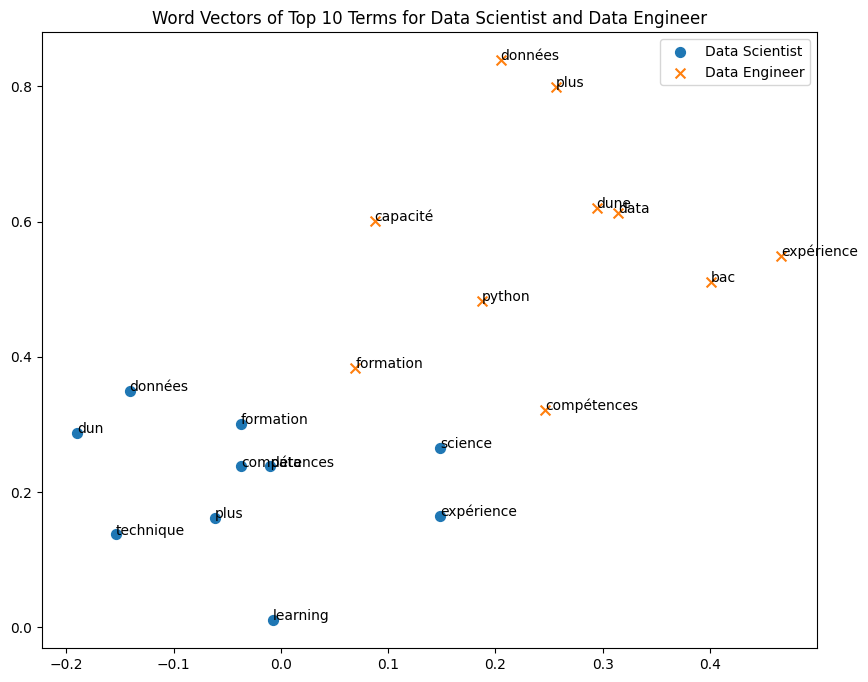

In [231]:
# Graphique dans le plan
plt.figure(figsize=(10, 8))

# Scatter plot pour Data Scientist
plt.scatter(df_scientist['V0'], df_scientist['V1'], s=50, label='Data Scientist')
for i in range(df_scientist.shape[0]):
    plt.annotate(df_scientist.index[i], (df_scientist['V0'][i], df_scientist['V1'][i]))

# Scatter plot pour Data Engineer
plt.scatter(df_engineer['V0'], df_engineer['V1'], s=50, label='Data Engineer', marker='x')
for i in range(df_engineer.shape[0]):
    plt.annotate(df_engineer.index[i], (df_engineer['V0'][i], df_engineer['V1'][i]))

plt.legend()
plt.title('Word Vectors of Top 10 Terms for Data Scientist and Data Engineer')
plt.show()

Ce graphique représente les vecteurs associés aux termes les plus fréquents dans les modèles Word2Vec pour les profils "Data Scientist" et "Data Engineer". 
Chaque point sur le graphique représente un terme, et sa position est déterminée par les valeurs des deux premières dimensions du vecteur associé à ce terme.
La distance entre les points (cercles et croix) sur le graphique reflète la similarité entre les termes. Des points proches indiquent des termes similaires en termes de contexte ou de co-occurrence dans les corpus.
Si deux termes ont des positions similaires dans l'espace vectoriel, cela suggère qu'ils sont utilisés de manière similaire ou qu'ils apparaissent dans des contextes similaires dans les descriptions de postes correspondantes. À l'inverse, des termes éloignés indiquent une différence dans la manière dont ils sont utilisés.
Les termes qui sont regroupés ou proches peuvent indiquer des similitudes dans les compétences recherchées ou les domaines d'expertise pour ces rôles.